# K Nearest Neighbours

## Importing Dependencies

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('Vowel.csv')
df.head()
df.sample(5)

,Class,F1,F2,F3
382,4,400,900,2800
378,4,400,1000,2800
625,5,450,1600,2200
864,6,500,1050,2800
68,1,650,1200,2300


In [4]:
df.value_counts('Class')

Class
5    207
6    180
3    172
4    151
2     89
1     72
Name: count, dtype: int64

## Separate Predictors and Response

In [6]:
X=df.drop(columns=['Class'])
Y=df['Class']
X.head()

,F1,F2,F3
0,700,1500,2600
1,550,1550,2400
2,700,1500,2600
3,700,1600,2700
4,550,1600,2600


## Defining KNN function

In [7]:
#defining euclidean distance first

def e_dist(a,b):
    return np.sqrt(np.sum(np.square(a-b)))

In [8]:
def KNN(X_train,Y_train,x_test,k): # KNN for each test value
    distances=[]
    labels=[]
    for x in X_train:
        distances.append(e_dist(x,x_test)) #find euclidean distance between each test value and all train values
    #get the first k indices of the sorted array in increasing order
    k_indices=np.argsort(distances)[:k]
    # get the labels index wise
    for index in k_indices:
        labels.append(Y_train[index])
    # Majority Voting
    return max(set(labels),key=labels.count) #Calls .count() only on unique labels, making it faster

## Splitting Train test data

### 80-20 Split

In [12]:
#80% train, 20%test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=42,stratify=Y)
Y_train.head()

46     1
118    2
719    6
208    3
168    3
Name: Class, dtype: int64

In [13]:
y_hat=[]
for x_test in X_test.to_numpy():
    y_hat.append(KNN(X_train.to_numpy(),Y_train.to_numpy(),x_test,k=5))
y_hat=np.array(y_hat)
y_hat

array([1, 3, 6, 3, 6, 5, 6, 4, 5, 6, 5, 3, 6, 4, 3, 3, 1, 4, 3, 6, 5, 3,
       5, 6, 3, 6, 3, 6, 5, 2, 1, 4, 5, 3, 4, 6, 6, 5, 3, 5, 2, 4, 2, 6,
       5, 5, 4, 4, 5, 5, 5, 4, 3, 6, 6, 4, 3, 6, 5, 4, 2, 5, 5, 5, 6, 5,
       5, 4, 1, 1, 3, 4, 3, 5, 1, 4, 4, 1, 5, 4, 2, 4, 5, 5, 4, 3, 5, 5,
       4, 6, 6, 5, 6, 1, 3, 5, 6, 6, 3, 6, 6, 5, 6, 5, 2, 6, 2, 6, 3, 3,
       3, 5, 6, 3, 6, 5, 1, 4, 3, 2, 5, 6, 3, 5, 4, 3, 2, 6, 6, 5, 4, 2,
       6, 4, 5, 2, 5, 4, 6, 1, 2, 3, 6, 5, 1, 4, 2, 3, 6, 1, 5, 3, 5, 6,
       5, 3, 2, 1, 3, 5, 6, 5, 5, 4, 4, 1, 2, 4, 4, 6, 5, 3, 4, 3, 6],
      dtype=int64)

#### Calculating test accuracy

In [14]:
accuracy=np.mean(y_hat==Y_test.to_numpy())
accuracy*100

84.0

### 70-30 Split

In [15]:
#70% train, 30%test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42,stratify=Y)

In [16]:
y_hat=[]
for x_test in X_test.to_numpy():
    y_hat.append(KNN(X_train.to_numpy(),Y_train.to_numpy(),x_test,k=5))
y_hat=np.array(y_hat)
y_hat

array([6, 4, 6, 4, 1, 1, 4, 3, 5, 2, 5, 5, 2, 4, 3, 4, 6, 2, 3, 5, 6, 3,
       4, 3, 3, 5, 5, 3, 5, 6, 1, 2, 4, 4, 3, 4, 4, 5, 6, 4, 2, 1, 5, 5,
       5, 2, 4, 6, 5, 1, 3, 6, 2, 5, 3, 4, 3, 4, 3, 4, 5, 6, 3, 5, 6, 4,
       6, 6, 5, 4, 6, 2, 6, 3, 2, 3, 2, 4, 6, 4, 1, 6, 3, 3, 1, 4, 6, 5,
       5, 6, 1, 5, 5, 4, 3, 2, 3, 4, 3, 3, 2, 4, 4, 6, 4, 6, 5, 6, 6, 5,
       3, 5, 1, 4, 4, 5, 5, 2, 3, 5, 3, 5, 2, 4, 4, 6, 3, 6, 4, 5, 6, 6,
       5, 3, 6, 6, 4, 5, 6, 6, 3, 1, 6, 3, 4, 3, 3, 3, 4, 3, 6, 4, 1, 4,
       5, 2, 5, 5, 1, 3, 1, 5, 3, 5, 5, 5, 5, 6, 6, 2, 2, 3, 3, 6, 1, 5,
       5, 5, 6, 6, 6, 4, 6, 5, 2, 6, 3, 3, 3, 5, 3, 5, 5, 2, 3, 6, 6, 5,
       3, 6, 5, 4, 3, 6, 2, 6, 4, 3, 6, 5, 2, 5, 6, 3, 2, 5, 4, 5, 5, 4,
       3, 2, 6, 4, 6, 5, 4, 1, 6, 1, 5, 5, 5, 3, 6, 5, 5, 4, 2, 6, 4, 3,
       5, 4, 1, 3, 3, 6, 5, 3, 3, 6, 4, 4, 1, 6, 6, 3, 6, 6, 4, 3],
      dtype=int64)

#### Calculating test accuracy

In [17]:
accuracy=np.mean(y_hat==Y_test.to_numpy())
accuracy*100

83.20610687022901

### 60-40 Split

In [18]:
#60% train, 40%test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=42,stratify=Y)

In [19]:
y_hat=[]
for x_test in X_test.to_numpy():
    y_hat.append(KNN(X_train.to_numpy(),Y_train.to_numpy(),x_test,k=5))
y_hat=np.array(y_hat)
y_hat

array([5, 3, 5, 5, 6, 6, 4, 3, 3, 6, 4, 6, 2, 6, 3, 4, 2, 6, 4, 6, 5, 3,
       3, 4, 3, 5, 4, 3, 6, 4, 5, 2, 3, 3, 5, 3, 3, 5, 6, 5, 2, 6, 6, 5,
       6, 1, 1, 5, 4, 5, 5, 6, 2, 4, 4, 3, 6, 3, 3, 6, 3, 1, 2, 4, 5, 5,
       6, 6, 6, 1, 6, 1, 5, 2, 2, 3, 6, 4, 5, 1, 5, 5, 3, 2, 1, 3, 6, 6,
       6, 5, 5, 6, 6, 3, 6, 1, 6, 4, 5, 3, 5, 4, 3, 3, 3, 5, 6, 4, 6, 4,
       6, 5, 6, 3, 3, 5, 4, 1, 3, 6, 3, 2, 2, 4, 3, 4, 1, 5, 5, 4, 5, 5,
       6, 2, 5, 6, 5, 4, 5, 5, 6, 5, 5, 3, 5, 6, 3, 3, 3, 3, 5, 3, 1, 3,
       2, 4, 4, 1, 3, 1, 5, 4, 6, 6, 6, 4, 5, 4, 1, 1, 6, 4, 5, 5, 6, 4,
       3, 3, 3, 5, 6, 5, 6, 2, 5, 6, 3, 3, 4, 3, 4, 1, 6, 3, 5, 6, 5, 1,
       5, 6, 3, 3, 6, 2, 3, 3, 3, 3, 5, 1, 5, 5, 2, 2, 6, 6, 3, 4, 5, 6,
       2, 5, 3, 5, 6, 4, 6, 5, 2, 5, 5, 6, 3, 6, 6, 3, 4, 6, 5, 5, 3, 4,
       3, 4, 6, 5, 6, 3, 6, 3, 6, 3, 3, 1, 4, 6, 4, 4, 5, 4, 6, 4, 6, 5,
       5, 3, 1, 6, 5, 2, 2, 5, 5, 4, 3, 5, 5, 6, 3, 5, 2, 4, 3, 2, 5, 2,
       5, 6, 5, 2, 1, 5, 2, 6, 4, 6, 3, 4, 4, 4, 4,

#### Calculating test accuracy

In [20]:
accuracy=np.mean(y_hat==Y_test.to_numpy())
accuracy*100

83.95415472779369

### 50-50 Split

In [21]:
#50% train, 50%test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=42,stratify=Y)

In [22]:
y_hat=[]
for x_test in X_test.to_numpy():
    y_hat.append(KNN(X_train.to_numpy(),Y_train.to_numpy(),x_test,k=5))
y_hat=np.array(y_hat)
y_hat

array([2, 6, 4, 3, 6, 1, 4, 5, 3, 3, 4, 5, 5, 4, 6, 4, 5, 4, 4, 2, 5, 4,
       3, 4, 4, 4, 1, 6, 5, 3, 3, 4, 6, 2, 5, 3, 6, 1, 2, 5, 5, 5, 5, 5,
       4, 5, 6, 3, 3, 6, 4, 6, 5, 6, 5, 6, 5, 4, 5, 1, 3, 1, 5, 2, 4, 1,
       3, 6, 3, 4, 5, 3, 3, 6, 6, 1, 3, 4, 4, 1, 5, 6, 4, 5, 5, 5, 3, 2,
       3, 6, 6, 5, 5, 4, 5, 3, 5, 4, 5, 4, 5, 6, 5, 6, 3, 3, 2, 2, 5, 3,
       6, 4, 5, 4, 5, 5, 3, 5, 5, 6, 4, 4, 6, 2, 5, 2, 3, 6, 6, 3, 3, 6,
       6, 6, 5, 6, 4, 2, 6, 5, 2, 5, 3, 3, 4, 6, 6, 4, 1, 6, 3, 6, 2, 1,
       4, 6, 5, 3, 3, 3, 1, 2, 4, 3, 5, 3, 5, 3, 5, 4, 3, 6, 4, 6, 6, 6,
       3, 5, 4, 6, 3, 1, 1, 3, 4, 4, 4, 6, 5, 4, 3, 3, 6, 1, 6, 3, 5, 4,
       5, 4, 2, 2, 6, 6, 3, 5, 5, 3, 2, 6, 3, 5, 3, 5, 6, 2, 4, 5, 3, 2,
       5, 4, 3, 6, 4, 6, 2, 4, 5, 5, 5, 6, 4, 2, 5, 6, 3, 3, 1, 4, 6, 3,
       6, 6, 3, 3, 6, 4, 3, 6, 3, 5, 6, 3, 5, 3, 1, 5, 5, 6, 2, 5, 5, 5,
       5, 4, 4, 3, 3, 5, 2, 6, 2, 6, 5, 2, 6, 3, 4, 2, 6, 6, 6, 6, 3, 6,
       6, 3, 3, 3, 3, 1, 4, 2, 6, 6, 5, 5, 4, 4, 5,

#### Calculating test accuracy

In [23]:
accuracy=np.mean(y_hat==Y_test.to_numpy())
accuracy*100

84.17431192660551

### K vs Accuracy (for 80-20 Split)

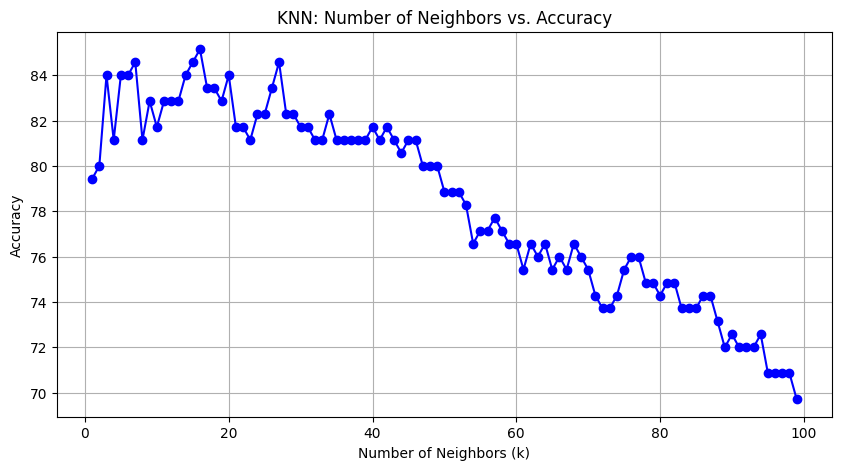

In [24]:
#80% train, 20%test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=42,stratify=Y)

accuracy=[]
k_values= range(1,100)
for k in k_values: 
    y_hat=[]
    for x_test in X_test.to_numpy():
        y_hat.append(KNN(X_train.to_numpy(),Y_train.to_numpy(),x_test,k))
    accuracy.append(np.mean(np.array(y_hat)==Y_test.to_numpy())*100)

# Plot k vs Accuracy
title = "KNN: Number of Neighbors vs. Accuracy"
plt.figure(figsize=(10, 5))
plt.plot(k_values, accuracy, marker='o', linestyle='-', color='b')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title(title)
plt.grid()
plt.show()